# Import needed libraries

In [2]:
# python library to perform numeric operations on numpy arrays
import numpy as np

# python library to process dataframe and do analysis on them
import pandas as pd

# !pip install xlrd
# python library to deal with excel files
import xlrd

# python libraries for visualisation
from matplotlib import pyplot as plt
# built on top of matplotlib
import seaborn as sns

These rows contain info about:
    
when the datafile was downloaded

who it was created for

the total raised: empty
    
Min: 6m (more than 6 million euros invested)
    
Startups who have headquarters in Europe

These startups are backed by Venture Capitalist

What does Ownership status mean? (is it public or privately owned)

Privately held (not publicly listed)

All these startups were founded from 2012 onwards

In [3]:
# Using the Pandas python library
# Load the excel datafile
# Located in the data directory which is one directory above hence the ..

data_path = '../data/PitchBook_All_Columns_2017_09_11_08_42_13.xlsx'
pitchbk_data = pd.read_excel(data_path, skiprows=7)

In [4]:
# Display a verbose description of the dataset
# This includes number of columns, datatype of each column, how much memory the file takes up

pitchbk_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 130 columns):
Company ID                             object
Company Name                           object
Company Former Name                    object
Company Also Known As                  object
PBId                                   object
Description                            object
Primary Industry Sector                object
Primary Industry Group                 object
Primary Industry Code                  object
All Industries                         object
Industry Vertical                      object
Company Financing Status               object
Total Raised                           float64
Business Status                        object
Ownership Status                       object
Universe                               object
Website                                object
Employees                              float64
Exchange                               float64
Ticker           

Here, the Pitchbook data says that there are 503 rows (entries), indexed from 0 to 502.
In addition, there are 130 columns of different datatypes (many objects like strings (ie phrases or names), a good number of numeric values (floats) and a couple date and time formatted columns). 

The result of this information implies that some cleaning and encoding of the dataset will need to be done to present it in an effective structure for the Machine Learning algorithms later on.

Finally, the dataset takes up ~500 KB (1/2 a Gigabyte).

In [5]:
# Display the dimension of the dataframe 
# which from the info above should be 503 rows and 130 columns

pitchbk_data.shape

(503, 130)

(503,130) indicates that there are 503 startups in the dataframe and 130 attributes/features about each startup.

In [6]:
# Display column/attribute names
# pitchbk_data.columns.values

The decoding from the excel dataframe caused the u' to be attached to the names. The following cell shows the proper formatted names

In [7]:
# encode names correctly
list_col_names = [name.encode('utf-8') for name in pitchbk_data.columns.values]

# get first 20 features
print(list_col_names[:20])

['Company ID', 'Company Name', 'Company Former Name', 'Company Also Known As', 'PBId', 'Description', 'Primary Industry Sector', 'Primary Industry Group', 'Primary Industry Code', 'All Industries', 'Industry Vertical', 'Company Financing Status', 'Total Raised', 'Business Status', 'Ownership Status', 'Universe', 'Website', 'Employees', 'Exchange', 'Ticker']


In [8]:
# Display the first 10 rows of the dataframe (modified dataset)
pitchbk_data.head(n=10)

Company ID           Company Name Company Former Name Company Also Known As  \
0   61943-41         1001Pharmacies                 NaN                   NaN   
1  126697-60              24Storage                 NaN                   NaN   
2   60359-86                   2Can                 NaN                   NaN   
3   81674-02            360imprimir                 NaN                   NaN   
4   58634-74                3D Hubs                 NaN                   NaN   
5  172624-96           A Cloud Guru                 NaN            acloudguru   
6  108577-54                  Acast       Acast Stories                   NaN   
7   64576-81              AccessPay                 NaN                   NaN   
8  167047-57  Achilles Therapeutics          AchillesTx                   NaN   
9   58006-72                Adbrain                 NaN                   NaN   

        PBId                                        Description  \
0   61943-41  Owner and operator of an online pharmacy porta...   
1  126697-60  Provider of self storage platform and services...   
2   60359-86  Developer of a mobile point of sale technology...   
3   81674-02  Provider of an online designing and printing p...   
4   58634-74  Developer of a three dimensional printing prod...   
5  172624-96  Operator of a cloud computing training platfor...   
6  108577-54  Provider of a curated platform designed to fac...   
7   64576-81  Developer of a cloud-based payment management ...   
8  167047-57  Developer of immunotherapies for cancer. The c...   
9   58006-72  Developer of a data intelligence platform desi...   

                Primary Industry Sector             Primary Industry Group  \
0                            Healthcare  Pharmaceuticals and Biotechnology   
1  Business Products and Services (B2B)                Commercial Services   
2                Information Technology                           Software   
3                Information Technology                           Software   
4  Business Products and Services (B2B)                Commercial Services   
5                Information Technology                           Software   
6                Information Technology                           Software   
7                Information Technology                           Software   
8                            Healthcare  Pharmaceuticals and Biotechnology   
9  Business Products and Services (B2B)                Commercial Services   

                  Primary Industry Code  \
0                       Pharmaceuticals   
1                             Logistics   
2                    Financial Software   
3              Social/Platform Software   
4               Printing Services (B2B)   
5                  Educational Software   
6                  Application Software   
7                    Financial Software   
8                         Biotechnology   
9  Media and Information Services (B2B)   

                                      All Industries       ...        \
0                  Pharmaceuticals*; Internet Retail       ...         
1              Logistics*; Other Commercial Services       ...         
2  Financial Software*; Application Software; Ver...       ...         
3                          Social/Platform Software*       ...         
4  Printing Services (B2B)*; Social/Platform Soft...       ...         
5  Educational Software*; Environmental Services ...       ...         
6  Application Software*; Entertainment Software;...       ...         
7      Financial Software*; Other Financial Services       ...         
8                                     Biotechnology*       ...         
9              Media and Information Services (B2B)*       ...         

  Facebook Likes Change Facebook Likes % Change  Majestic Referring Domains  \
0                 1.199                   2,13%                       1.677   
1                 0.000                   0,00%                         NaN   
2        

In [9]:
# Display the last 10 rows of the dataframe (modified dataset)
pitchbk_data.tail(n=10)

Company ID Company Name Company Former Name  \
493                     55804-15    Wikifolio                 NaN   
494                    168517-81      Wocozon                 NaN   
495                    110331-91         Wolt                 NaN   
496                     63706-42    Wonderbly        Lost My Name   
497                     56244-97     Workable                 NaN   
498                    125698-96         Wynd                 NaN   
499                     61963-48         Xapo                 NaN   
500                          NaN          NaN                 NaN   
501                          NaN          NaN                 NaN   
502  © PitchBook Data, Inc. 2017          NaN                 NaN   

    Company Also Known As       PBId  \
493                   NaN   55804-15   
494                   NaN  168517-81   
495                   NaN  110331-91   
496                   NaN   63706-42   
497           Workable HR   56244-97   
498                   NaN  125698-96   
499                   NaN   61963-48   
500                   NaN        NaN   
501                   NaN        NaN   
502                   NaN        NaN   

                                           Description  \
493  Provider of a social trading platform designed...   
494  Provider of solar power. The company installs ...   
495  Provider of an online food ordering platform. ...   
496  Publisher of personalized children's books. Th...   
497  Provider of recruiting software designed to st...   
498  Provider of restaurant management software. Th...   
499  Provider of bitcoin security services. The com...   
500                                                NaN   
501                                                NaN   
502                                                NaN   

                  Primary Industry Sector Primary Industry Group  \
493                Information Technology               Software   
494                                Energy        Energy Services   
495  Consumer Products and Services (B2C)                 Retail   
496  Consumer Products and Services (B2C)                  Media   
497                Information Technology               Software   
498                Information Technology               Software   
499                Information Technology               Software   
500                                   NaN                    NaN   
501                                   NaN                    NaN   
502                                   NaN                    NaN   

          Primary Industry Code  \
493          Financial Software   
494  Energy Traders and Brokers   
495             Internet Retail   
496                  Publishing   
497        Application Software   
498    Social/Platform Software   
499          Financial Software   
500                         NaN   
501                         NaN   
502                         NaN   

                                        All Industries       ...        \
493      Financial Software*; Other Financial Services       ...         
494  Energy Traders and Brokers*; Energy Infrastruc...       ...         
495  Internet Retail*; Other Retail; Application So...       ...         
496                                        Publishing*       ...         
497      Application Software*; Human Capital Services       ...         
498  Social/Platform Software*; Other Restaurants, ...       ...         
499  Financial Software*; Other Financial Services;...       ...         
500                                                NaN       ...         
501                                                NaN       ...         
502                                                NaN       ...         

    Facebook Likes Change Facebook Likes % Change  Majestic Referring Domains  \
493                54.000                   0,44%                       1.315   
494                 0.000                   0,00%                     

In [10]:
# Although it doesnt make enough sense yet due to the dataset not being fully cleaned
# Here a statistical description of each of the 42 numeric attributes (see info above)
# like the number of counts, means etc

pitchbk_data.describe()

Total Raised    Employees  Exchange  Ticker  Year Founded  \
count    500.000000   414.000000       0.0     0.0    500.000000   
mean      28.620800    68.526570       NaN     NaN   2013.432000   
std       60.783164   179.014853       NaN     NaN      1.263554   
min        6.000000     1.000000       NaN     NaN   2012.000000   
25%        8.230000    13.000000       NaN     NaN   2012.000000   
50%       12.705000    30.000000       NaN     NaN   2013.000000   
75%       24.500000    58.750000       NaN     NaN   2014.000000   
max      762.250000  2356.000000       NaN     NaN   2017.000000   

       Parent Company      Revenue  Gross Profit  Net Income  \
count             0.0   125.000000     25.000000   96.000000   
mean              NaN    23.797642      0.566701   -3.760624   
std               NaN   135.794189      2.874780    8.052448   
min               NaN     0.000000     -7.081260  -60.424870   
25%               NaN     0.243510     -0.165370   -3.918382   
50%               NaN     1.791520      0.350980   -1.330985   
75%               NaN     7.214700      1.828270   -0.515317   
max               NaN  1499.995880      6.232240    6.100370   

       Enterprise Value       ...        Majestic Size Multiple Percentile  \
count           1.00000       ...                               386.000000   
mean           20.29275       ...                                66.694301   
std                 NaN       ...                                22.561772   
min            20.29275       ...                                 1.000000   
25%            20.29275       ...                                49.250000   
50%            20.29275       ...                                71.500000   
75%            20.29275       ...                                84.000000   
max            20.29275       ...                               100.000000   

       Facebook Size Multiple Percentile  Twitter Size Multiple Percentile  \
count                         335.000000                        370.000000   
mean                           67.683582                         67.802703   
std                            26.957744                         24.171396   
min                             1.000000                          1.000000   
25%                            51.000000                         53.000000   
50%                            76.000000                         74.000000   
75%                            90.000000                         87.000000   
max                           100.000000                        100.000000   

       SimilarWeb Unique Visitors Change  Facebook Likes Change  \
count                         444.000000             339.000000   
mean                          -44.449619              62.260608   
std                           299.114190             155.792581   
min                          -987.000000            -365.000000   
25%                          -114.500000               1.000000   
50%                            -3.662000               5.839000   
75%                            27.250000              41.500000   
max                           969.000000             979.000000   

       Majestic Referring Domains  Majestic Referring Domains Change  \
count                  386.000000                         386.000000   
mean                   167.074104                           1.676166   
std                    210.778045                          12.245171   
min                      1.000000                         -33.000000   
25%                     26.000000                          -2.000000   
50%                     72.000000                           0.000000   
75%                    231.250000                           1.000000   
max                    977.000000                         102.000000   

       Twitter Followers  Twitter Followers Change  PitchBook Link  
count         378.000000                378.000000             0.0  
mean          177.02

Observations so far:
    
The object data and data and time attributes need to be encoded effectively to numeric attributes.

In addition, some numeric attributes need to also be encoded like Exchange, Ticker etc... to keep the information needed to describe the distribution among the attributes

Also the pitchbook link attribute may need to be removed as from first glance it doesnt seem to carry information

Here is a visualisation of the relationship between the Twitter size attribute and the Facebook size attribute

In [11]:
# get each attribute
pitchbk_yrFounded = pitchbk_data['Year Founded']
pitchbk_total = pitchbk_data['Total Raised']

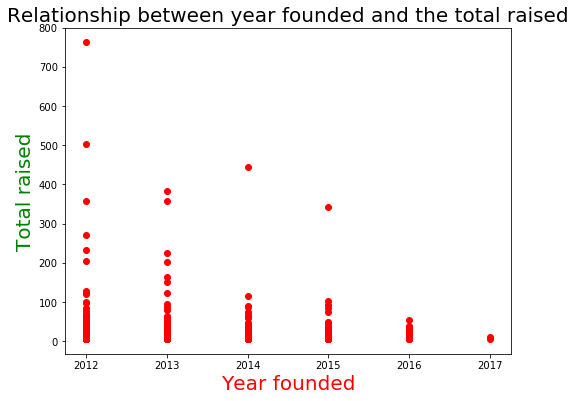

In [12]:
# create plot
plt.figure(figsize=(8,6))

# scatterplot of facebook attribute (x axis) against twitter attribute (y axis)
plt.scatter(x=pitchbk_yrFounded, y=pitchbk_total, c='red')

plt.xlabel("Year founded", color='red', size=20)
plt.ylabel("Total raised", color='green', size=20)
plt.title("Relationship between year founded and the total raised", size=20)

plt.show()


## Following conversation with Christoph 


Here, I am investigating the relationship between numeric attributes present in the original dataset. This is before doing any categorising of textual data attributes like a companies name. The reason for doing this is to investigate if there are some attributes that are not important as they are "perfectly" correlated with other attributes.


In [13]:
pitchbk_data.describe()

Total Raised    Employees  Exchange  Ticker  Year Founded  \
count    500.000000   414.000000       0.0     0.0    500.000000   
mean      28.620800    68.526570       NaN     NaN   2013.432000   
std       60.783164   179.014853       NaN     NaN      1.263554   
min        6.000000     1.000000       NaN     NaN   2012.000000   
25%        8.230000    13.000000       NaN     NaN   2012.000000   
50%       12.705000    30.000000       NaN     NaN   2013.000000   
75%       24.500000    58.750000       NaN     NaN   2014.000000   
max      762.250000  2356.000000       NaN     NaN   2017.000000   

       Parent Company      Revenue  Gross Profit  Net Income  \
count             0.0   125.000000     25.000000   96.000000   
mean              NaN    23.797642      0.566701   -3.760624   
std               NaN   135.794189      2.874780    8.052448   
min               NaN     0.000000     -7.081260  -60.424870   
25%               NaN     0.243510     -0.165370   -3.918382   
50%               NaN     1.791520      0.350980   -1.330985   
75%               NaN     7.214700      1.828270   -0.515317   
max               NaN  1499.995880      6.232240    6.100370   

       Enterprise Value       ...        Majestic Size Multiple Percentile  \
count           1.00000       ...                               386.000000   
mean           20.29275       ...                                66.694301   
std                 NaN       ...                                22.561772   
min            20.29275       ...                                 1.000000   
25%            20.29275       ...                                49.250000   
50%            20.29275       ...                                71.500000   
75%            20.29275       ...                                84.000000   
max            20.29275       ...                               100.000000   

       Facebook Size Multiple Percentile  Twitter Size Multiple Percentile  \
count                         335.000000                        370.000000   
mean                           67.683582                         67.802703   
std                            26.957744                         24.171396   
min                             1.000000                          1.000000   
25%                            51.000000                         53.000000   
50%                            76.000000                         74.000000   
75%                            90.000000                         87.000000   
max                           100.000000                        100.000000   

       SimilarWeb Unique Visitors Change  Facebook Likes Change  \
count                         444.000000             339.000000   
mean                          -44.449619              62.260608   
std                           299.114190             155.792581   
min                          -987.000000            -365.000000   
25%                          -114.500000               1.000000   
50%                            -3.662000               5.839000   
75%                            27.250000              41.500000   
max                           969.000000             979.000000   

       Majestic Referring Domains  Majestic Referring Domains Change  \
count                  386.000000                         386.000000   
mean                   167.074104                           1.676166   
std                    210.778045                          12.245171   
min                      1.000000                         -33.000000   
25%                     26.000000                          -2.000000   
50%                     72.000000                           0.000000   
75%                    231.250000                           1.000000   
max                    977.000000                         102.000000   

       Twitter Followers  Twitter Followers Change  PitchBook Link  
count         378.000000                378.000000             0.0  
mean          177.02

From investigating the dataset above there are 3 datatypes currently in the dataset. Time/date, float (numeric values) and object (strings, text, etc...)

In [14]:
# get numeric features only
# include needs to take in a list of possible datatypes
num_pitchbk = pitchbk_data.select_dtypes(include=['float64'])

In [15]:
num_pitchbk

Total Raised  Employees  Exchange  Ticker  Year Founded  Parent Company  \
0           10.60       35.0       NaN     NaN        2012.0             NaN   
1           37.76        7.0       NaN     NaN        2015.0             NaN   
2           10.67       21.0       NaN     NaN        2012.0             NaN   
3            7.25      120.0       NaN     NaN        2013.0             NaN   
4            9.83       85.0       NaN     NaN        2013.0             NaN   
5            6.08        NaN       NaN     NaN        2015.0             NaN   
6            7.58       39.0       NaN     NaN        2013.0             NaN   
7           10.80       35.0       NaN     NaN        2012.0             NaN   
8           14.80        9.0       NaN     NaN        2016.0             NaN   
9           15.40       44.0       NaN     NaN        2012.0             NaN   
10         233.45       14.0       NaN     NaN        2012.0             NaN   
11          24.29       55.0       NaN     NaN        2012.0             NaN   
12           7.44       38.0       NaN     NaN        2012.0             NaN   
13          11.00       45.0       NaN     NaN        2014.0             NaN   
14           8.70        NaN       NaN     NaN        2012.0             NaN   
15          11.96        NaN       NaN     NaN        2015.0             NaN   
16          12.52       75.0       NaN     NaN        2013.0             NaN   
17          11.88       30.0       NaN     NaN        2015.0             NaN   
18           6.35        5.0       NaN     NaN        2015.0             NaN   
19           7.40      120.0       NaN     NaN        2015.0             NaN   
20          10.38       21.0       NaN     NaN        2014.0             NaN   
21           7.31       11.0       NaN     NaN        2014.0             NaN   
22          14.37       70.0       NaN     NaN        2013.0             NaN   
23          11.77       11.0       NaN     NaN        2015.0             NaN   
24          65.76      115.0       NaN     NaN        2012.0             NaN   
25          16.82      140.0       NaN     NaN        2012.0             NaN   
26          37.00        6.0       NaN     NaN        2013.0             NaN   
27          10.96        NaN       NaN     NaN        2015.0             NaN   
28          10.45       12.0       NaN     NaN        2013.0             NaN   
29          10.55        8.0       NaN     NaN        2012.0             NaN   
..            ...        ...       ...     ...           ...             ...   
473         15.00       44.0       NaN     NaN        2014.0             NaN   
474          6.50       11.0       NaN     NaN        2012.0             NaN   
475         10.30       40.0       NaN     NaN        2013.0             NaN   
476         17.00        NaN       NaN     NaN        2013.0             NaN   
477         12.84        NaN       NaN     NaN        2016.0             NaN   
478         35.32       60.0       NaN     NaN        2014.0             NaN   
479         10.00       11.0       NaN     NaN        2013.0             NaN   
480          7.70       18.0       NaN     NaN        2013.0             NaN   
481          8.91        7.0       NaN     NaN        2013.0             NaN   
482         37.12        NaN       NaN     NaN        2016.0             NaN   
483          8.95       23.0       NaN     NaN        2013.0             NaN   
484          7.51       15.0       NaN     NaN        2014.0             NaN   
485        124.18      117.0       NaN     NaN        2013.0             NaN   
486         21.28       91.0       NaN     NaN        2012.0             NaN   
487         13.66       70.0       NaN     NaN        2015.0             NaN   
488         14.06        7.0       NaN     NaN        2012.0             NaN   
489         16.84       14.0       NaN     NaN        2012.0             NaN   
490         17.32       16.0       NaN     NaN        2014.0             NaN   
491  

As you can see there are some entries with NaN (not a number values). This could be due to missing entries in the Pitchbook dataset (most of them are), also due to wrong transcription of info.

My step to clean this up is to remove the columns just containing NaNs, at this stage. Note that, when incorporating the textual information and data/time, for the machine learning model, there will be numeric encoding of these attributes but at this stage they will be discarded.

The resulting output is the following:

In [16]:
# axis=1 relates to columns
# if all values in a column are NaN, the column is dropped
clean_numpitchbk = num_pitchbk.dropna(axis=1, how='all')

9 columns were dropped (42 columns - 33 columns)

In [17]:
clean_numpitchbk

Total Raised  Employees  Year Founded  Revenue  Gross Profit  Net Income  \
0           10.60       35.0        2012.0  6.99694           NaN         NaN   
1           37.76        7.0        2015.0  2.48057           NaN     0.33074   
2           10.67       21.0        2012.0  1.03396           NaN    -1.34700   
3            7.25      120.0        2013.0  6.00457           NaN         NaN   
4            9.83       85.0        2013.0      NaN           NaN         NaN   
5            6.08        NaN        2015.0      NaN           NaN         NaN   
6            7.58       39.0        2013.0  1.79152           NaN    -3.69329   
7           10.80       35.0        2012.0  2.80388       1.97206    -1.16828   
8           14.80        9.0        2016.0      NaN           NaN         NaN   
9           15.40       44.0        2012.0      NaN           NaN         NaN   
10         233.45       14.0        2012.0      NaN           NaN         NaN   
11          24.29       55.0        2012.0      NaN           NaN         NaN   
12           7.44       38.0        2012.0      NaN           NaN         NaN   
13          11.00       45.0        2014.0  0.99840           NaN         NaN   
14           8.70        NaN        2012.0      NaN           NaN         NaN   
15          11.96        NaN        2015.0      NaN           NaN         NaN   
16          12.52       75.0        2013.0  0.99840           NaN         NaN   
17          11.88       30.0        2015.0      NaN           NaN         NaN   
18           6.35        5.0        2015.0  0.21818           NaN    -0.99602   
19           7.40      120.0        2015.0      NaN           NaN         NaN   
20          10.38       21.0        2014.0      NaN           NaN         NaN   
21           7.31       11.0        2014.0      NaN           NaN         NaN   
22          14.37       70.0        2013.0      NaN           NaN         NaN   
23          11.77       11.0        2015.0      NaN           NaN         NaN   
24          65.76      115.0        2012.0      NaN           NaN         NaN   
25          16.82      140.0        2012.0      NaN           NaN   -12.41204   
26          37.00        6.0        2013.0      NaN           NaN         NaN   
27          10.96        NaN        2015.0      NaN           NaN         NaN   
28          10.45       12.0        2013.0      NaN           NaN         NaN   
29          10.55        8.0        2012.0      NaN           NaN         NaN   
..            ...        ...           ...      ...           ...         ...   
473         15.00       44.0        2014.0      NaN           NaN         NaN   
474          6.50       11.0        2012.0  0.30322           NaN         NaN   
475         10.30       40.0        2013.0      NaN           NaN         NaN   
476         17.00        NaN        2013.0      NaN           NaN         NaN   
477         12.84        NaN        2016.0      NaN           NaN         NaN   
478         35.32       60.0        2014.0      NaN           NaN         NaN   
479         10.00       11.0        2013.0      NaN           NaN         NaN   
480          7.70       18.0        2013.0      NaN           NaN         NaN   
481          8.91        7.0        2013.0      NaN           NaN         NaN   
482         37.12        NaN        2016.0      NaN           NaN         NaN   
483          8.95       23.0        2013.0      NaN           NaN         NaN   
484          7.51       15.0        2014.0      NaN           NaN         NaN   
485        124.18      117.0        2013.0      NaN           NaN         NaN   
486         21.28       91.0        2012.0      NaN           NaN         NaN   
487         13.66       70.0        2015.0      NaN           NaN         NaN   
488         14.06        7.0        2012.0      NaN           NaN         NaN   
489         16.84       14.0        2012.0      NaN           NaN         NaN   
490         17.32       16.0        

In addition, the rows just containing NaN are dropped too.

In [18]:
clean_numpitchbk = clean_numpitchbk.dropna(axis=0, how='all')

3 rows were dropped (503-500)

In [19]:
clean_numpitchbk

Total Raised  Employees  Year Founded  Revenue  Gross Profit  Net Income  \
0           10.60       35.0        2012.0  6.99694           NaN         NaN   
1           37.76        7.0        2015.0  2.48057           NaN     0.33074   
2           10.67       21.0        2012.0  1.03396           NaN    -1.34700   
3            7.25      120.0        2013.0  6.00457           NaN         NaN   
4            9.83       85.0        2013.0      NaN           NaN         NaN   
5            6.08        NaN        2015.0      NaN           NaN         NaN   
6            7.58       39.0        2013.0  1.79152           NaN    -3.69329   
7           10.80       35.0        2012.0  2.80388       1.97206    -1.16828   
8           14.80        9.0        2016.0      NaN           NaN         NaN   
9           15.40       44.0        2012.0      NaN           NaN         NaN   
10         233.45       14.0        2012.0      NaN           NaN         NaN   
11          24.29       55.0        2012.0      NaN           NaN         NaN   
12           7.44       38.0        2012.0      NaN           NaN         NaN   
13          11.00       45.0        2014.0  0.99840           NaN         NaN   
14           8.70        NaN        2012.0      NaN           NaN         NaN   
15          11.96        NaN        2015.0      NaN           NaN         NaN   
16          12.52       75.0        2013.0  0.99840           NaN         NaN   
17          11.88       30.0        2015.0      NaN           NaN         NaN   
18           6.35        5.0        2015.0  0.21818           NaN    -0.99602   
19           7.40      120.0        2015.0      NaN           NaN         NaN   
20          10.38       21.0        2014.0      NaN           NaN         NaN   
21           7.31       11.0        2014.0      NaN           NaN         NaN   
22          14.37       70.0        2013.0      NaN           NaN         NaN   
23          11.77       11.0        2015.0      NaN           NaN         NaN   
24          65.76      115.0        2012.0      NaN           NaN         NaN   
25          16.82      140.0        2012.0      NaN           NaN   -12.41204   
26          37.00        6.0        2013.0      NaN           NaN         NaN   
27          10.96        NaN        2015.0      NaN           NaN         NaN   
28          10.45       12.0        2013.0      NaN           NaN         NaN   
29          10.55        8.0        2012.0      NaN           NaN         NaN   
..            ...        ...           ...      ...           ...         ...   
470         11.10      150.0        2012.0      NaN           NaN         NaN   
471          6.30       12.0        2015.0      NaN           NaN         NaN   
472         10.50       15.0        2013.0      NaN           NaN         NaN   
473         15.00       44.0        2014.0      NaN           NaN         NaN   
474          6.50       11.0        2012.0  0.30322           NaN         NaN   
475         10.30       40.0        2013.0      NaN           NaN         NaN   
476         17.00        NaN        2013.0      NaN           NaN         NaN   
477         12.84        NaN        2016.0      NaN           NaN         NaN   
478         35.32       60.0        2014.0      NaN           NaN         NaN   
479         10.00       11.0        2013.0      NaN           NaN         NaN   
480          7.70       18.0        2013.0      NaN           NaN         NaN   
481          8.91        7.0        2013.0      NaN           NaN         NaN   
482         37.12        NaN        2016.0      NaN           NaN         NaN   
483          8.95       23.0        2013.0      NaN           NaN         NaN   
484          7.51       15.0        2014.0      NaN           NaN         NaN   
485        124.18      117.0        2013.0      NaN           NaN         NaN   
486         21.28       91.0        2012.0      NaN           NaN         NaN   
487         13.66       70.0        

From investigating what happens when the "how" flag is set to any, it is clear that there is alot of inaccuracies when comparing startups. The reason I say this is because if you set the "how" flag to any there are no datapoints left, implying that every columns/row has a NaN in it. So it is important to pre-process the data intelligently (maybe encoding the NaN to 0)

What I decided to do is look at the statistics of each attribute and remove the one where there is no Standard deviation (Enterprise Value)

In [20]:
clean_numpitchbk.std()

Total Raised                            60.783164
Employees                              179.014853
Year Founded                             1.263554
Revenue                                135.794189
Gross Profit                             2.874780
Net Income                               8.052448
Enterprise Value                              NaN
EBITDA                                   4.659924
# Active Investors                       4.915552
First Financing Size                    52.983766
First Financing Valuation               47.947933
Last Financing Size                     59.350555
Last Financing Valuation               426.090042
Growth Rate Percentile                  38.447796
Web Growth Rate Percentile              37.539763
Social Growth Rate Percentile           29.014253
SimilarWeb Growth Rate Percentile       35.366254
Majestic Growth Rate Percentile         36.964463
Facebook Growth Rate Percentile         29.697140
Twitter Growth Rate Percentile          32.315118


In [21]:
clean_numpitchbk = clean_numpitchbk.drop(labels="Enterprise Value", axis=1)

Now all attributes have valid standard deviations, the attributes where NaN was present the NaN is just ignored

In [22]:
clean_numpitchbk.std()

Total Raised                            60.783164
Employees                              179.014853
Year Founded                             1.263554
Revenue                                135.794189
Gross Profit                             2.874780
Net Income                               8.052448
EBITDA                                   4.659924
# Active Investors                       4.915552
First Financing Size                    52.983766
First Financing Valuation               47.947933
Last Financing Size                     59.350555
Last Financing Valuation               426.090042
Growth Rate Percentile                  38.447796
Web Growth Rate Percentile              37.539763
Social Growth Rate Percentile           29.014253
SimilarWeb Growth Rate Percentile       35.366254
Majestic Growth Rate Percentile         36.964463
Facebook Growth Rate Percentile         29.697140
Twitter Growth Rate Percentile          32.315118
Size Multiple Percentile                24.610921


Get a plot of the first 5 attributes and how they relate to each other

In [23]:
clean_numpitchbk.describe()

Total Raised    Employees  Year Founded      Revenue  Gross Profit  \
count    500.000000   414.000000    500.000000   125.000000     25.000000   
mean      28.620800    68.526570   2013.432000    23.797642      0.566701   
std       60.783164   179.014853      1.263554   135.794189      2.874780   
min        6.000000     1.000000   2012.000000     0.000000     -7.081260   
25%        8.230000    13.000000   2012.000000     0.243510     -0.165370   
50%       12.705000    30.000000   2013.000000     1.791520      0.350980   
75%       24.500000    58.750000   2014.000000     7.214700      1.828270   
max      762.250000  2356.000000   2017.000000  1499.995880      6.232240   

       Net Income     EBITDA  # Active Investors  First Financing Size  \
count   96.000000  75.000000          498.000000            370.000000   
mean    -3.760624  -2.748787            6.981928             12.231162   
std      8.052448   4.659924            4.915552             52.983766   
min    -60.424870 -33.496900            1.000000              0.010000   
25%     -3.918382  -3.263150            3.250000              0.602500   
50%     -1.330985  -1.361100            6.000000              2.010000   
75%     -0.515317  -0.350915            9.000000              7.450000   
max      6.100370   1.303090           32.000000            762.250000   

       First Financing Valuation            ...             \
count                  65.000000            ...              
mean                   14.991231            ...              
std                    47.947933            ...              
min                     0.560000            ...              
25%                     1.540000            ...              
50%                     5.800000            ...              
75%                    14.600000            ...              
max                   383.420000            ...              

       SimilarWeb Size Multiple Percentile  Majestic Size Multiple Percentile  \
count                           438.000000                         386.000000   
mean                             71.458904                          66.694301   
std                              25.233770                          22.561772   
min                               1.000000                           1.000000   
25%                              58.250000                          49.250000   
50%                              79.000000                          71.500000   
75%                              92.000000                          84.000000   
max                             100.000000                         100.000000   

       Facebook Size Multiple Percentile  Twitter Size Multiple Percentile  \
count                         335.000000                        370.000000   
mean                           67.683582                         67.802703   
std                            26.957744                         24.171396   
min                             1.000000                          1.000000   
25%                            51.000000                         53.000000   
50%                            76.000000                         74.000000   
75%                            90.000000                         87.000000   
max                           100.000000                        100.000000   

       SimilarWeb Unique Visitors Change  Facebook Likes Change  \
count                         444.000000             339.000000   
mean                          -44.449619              62.260608   
std                           299.114190             155.792581   
min                          -987.000000            -365.000000   
25%                          -114.500000               1.000000   
50%                            -3.662000               5.839000   
75%                            27.250000              41.500000   
max                           969.000000             979.000000   

       Majestic Referring Domains  Majestic Referr

For now Im going to set all NaN to an extreme "value" (0)

In [24]:
clean_numpitchbk = clean_numpitchbk.fillna(0)

Finally to ensure appropriate comparison of attributes (which have different scales). I will normalise each attribute so they have mean 0 and variance 1.

In [25]:
df = clean_numpitchbk

# subtract each attribute by its mean
# divide by its standard deviation
df_normalise = (df-df.mean()) / (df.std())

normalised_numpitchbk = df_normalise

Through pairwise correlation of pitchbook attributes, we can see if certain attributes are "duplicates of another". To check if this is so so I am going to extract the attributes whose pairwise correlation is greater than 0.9 or less than -0.9

In [26]:
# get absolute value of correlation coefficient
corr = normalised_numpitchbk.corr(method='pearson').abs()

In [27]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr(method='pearson').abs().unstack() # get a vector of correlation coefficients
    
    labels_to_drop = get_redundant_pairs(df) # remove diagonals and lower triangular pairs
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False) # sort in descending order
    return au_corr[0:n]


print("Top 10 absolute Correlations")
print(get_top_abs_correlations(normalised_numpitchbk, 10))

Top 10 absolute Correlations
Size Multiple Percentile         Web Size Multiple Percentile           0.956631
Web Size Multiple Percentile     SimilarWeb Size Multiple Percentile    0.947992
Size Multiple Percentile         SimilarWeb Size Multiple Percentile    0.917103
Web Growth Rate Percentile       SimilarWeb Growth Rate Percentile      0.894007
Size Multiple Percentile         Social Size Multiple Percentile        0.884931
Social Size Multiple Percentile  Facebook Size Multiple Percentile      0.868767
                                 Twitter Size Multiple Percentile       0.843161
Social Growth Rate Percentile    Twitter Growth Rate Percentile         0.832855
Growth Rate Percentile           Web Growth Rate Percentile             0.826515
Revenue                          Last Financing Valuation               0.816850
dtype: float64


It looks like Size multiple percentile, similarweb size multiple percentile and web size multiple percentile carry similar information

### Visualisation of attributes and how they relate to each other

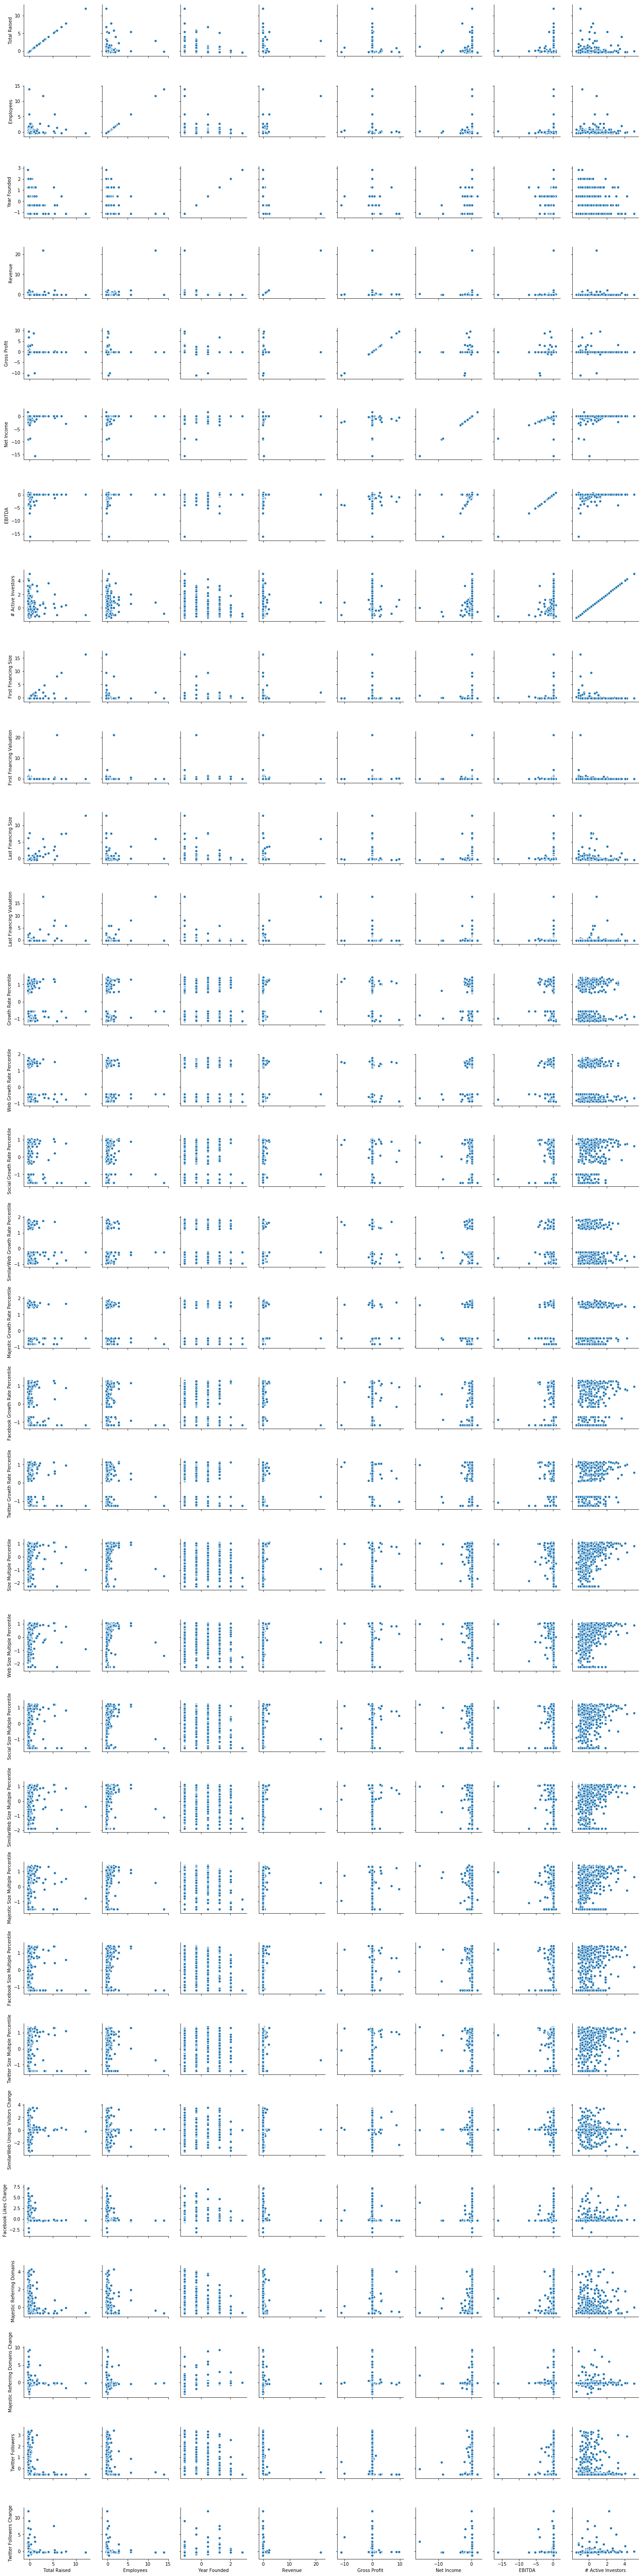

In [29]:
features = normalised_numpitchbk.columns.values

# example look at how all attributes rekate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[:4]
)
plt.show()

Important to mention that the setting of NaN values to 0 has an efect ofn the concentration of points around 0

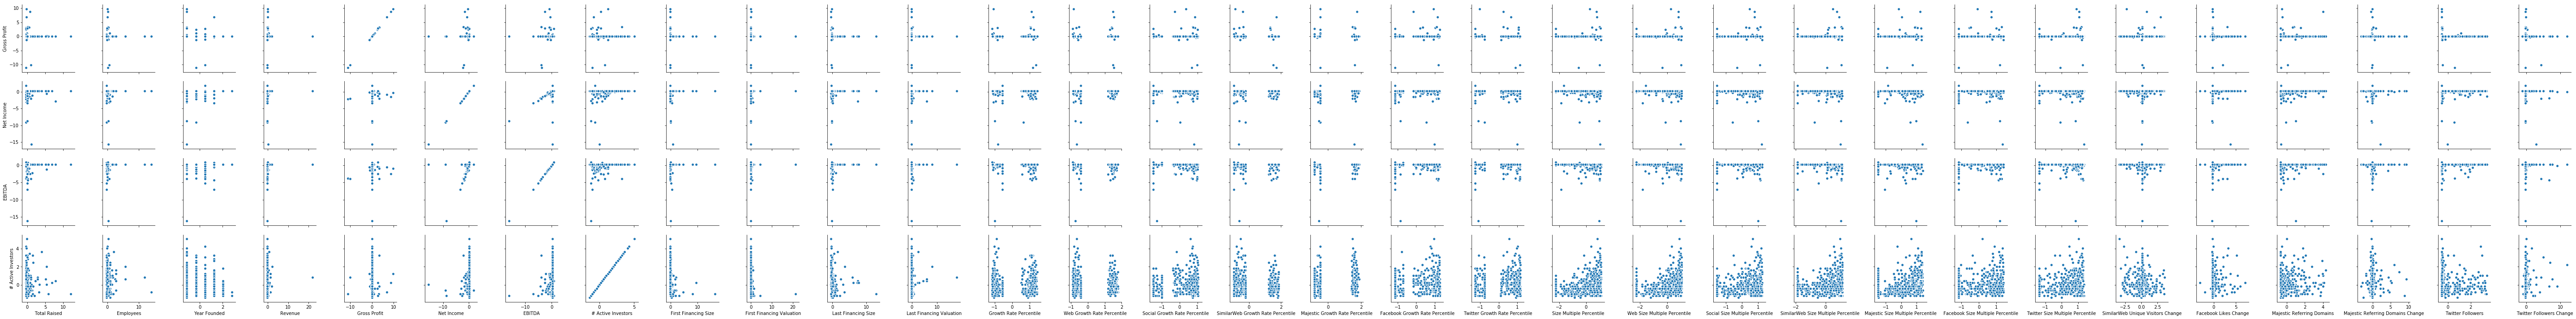

In [36]:
# example look at how all attributes relate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[4:8]
)
plt.show()

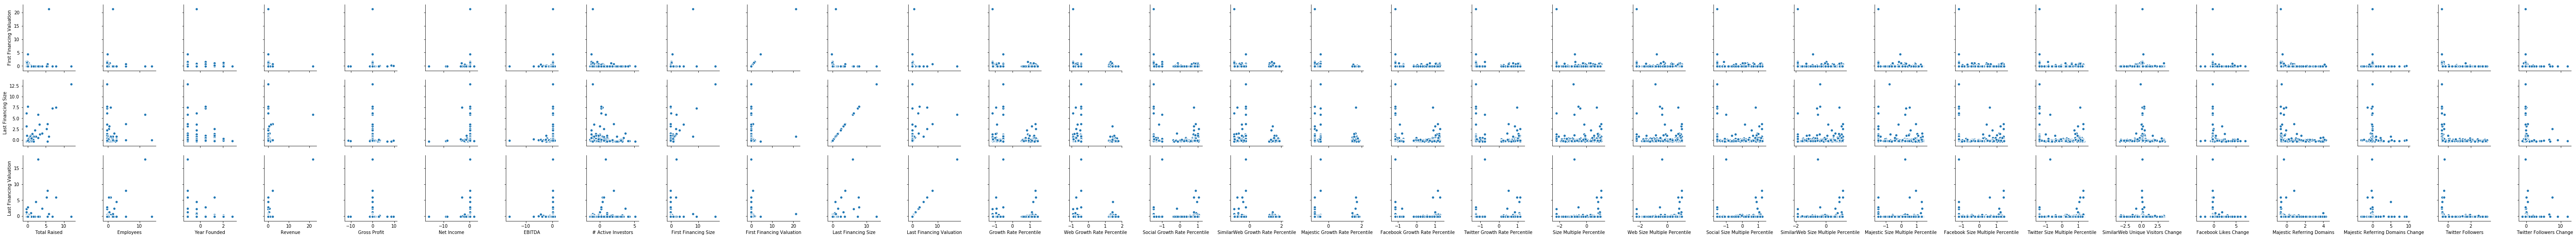

In [37]:
# example look at how all attributes relate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[9:12]
)
plt.show()

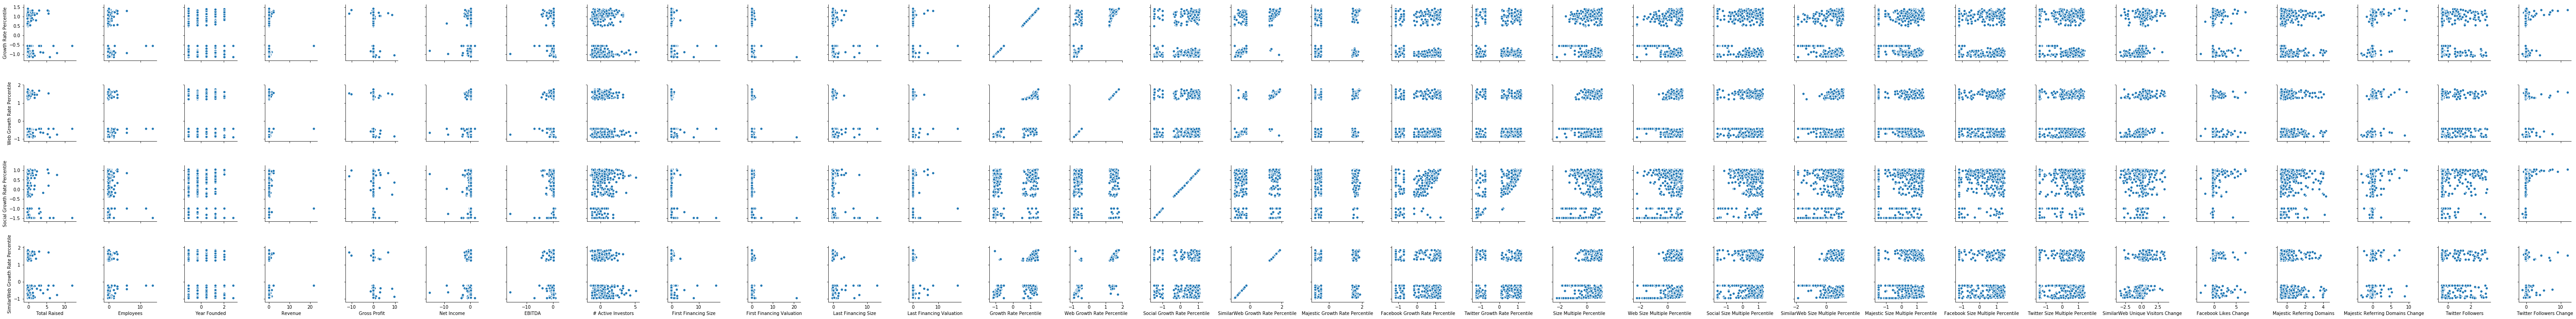

In [38]:
# example look at how all attributes relate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[12:16]
)
plt.show()

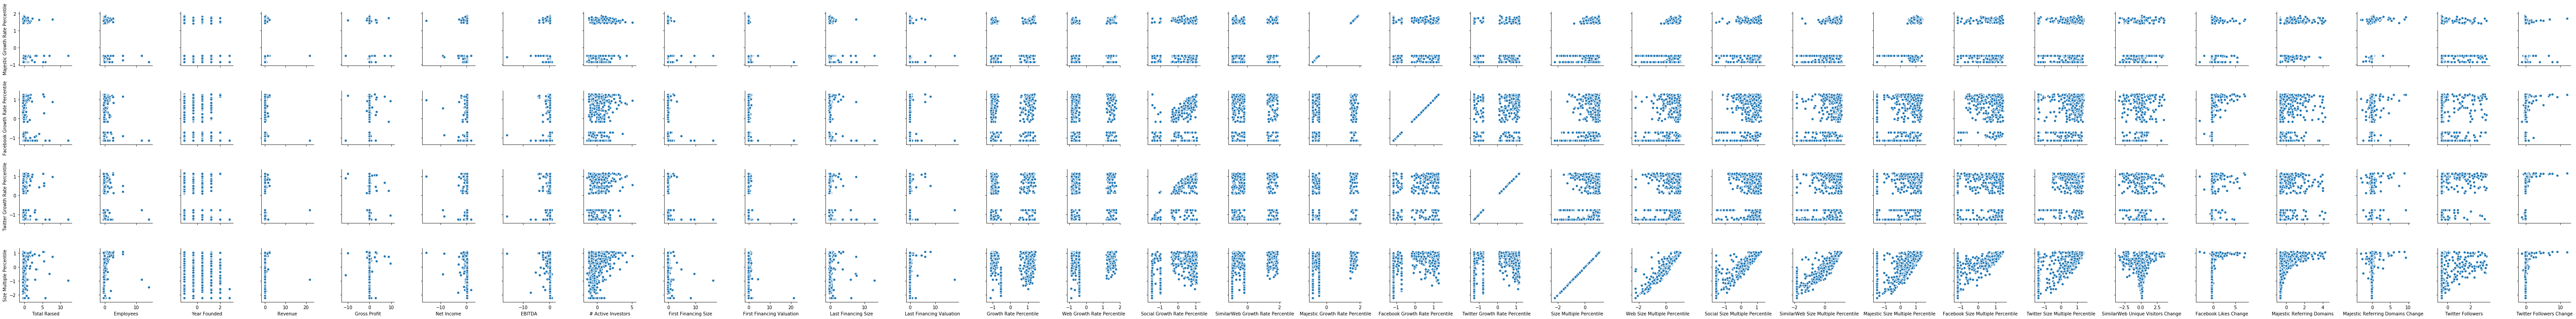

In [39]:
# example look at how all attributes relate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[16:20]
)
plt.show()

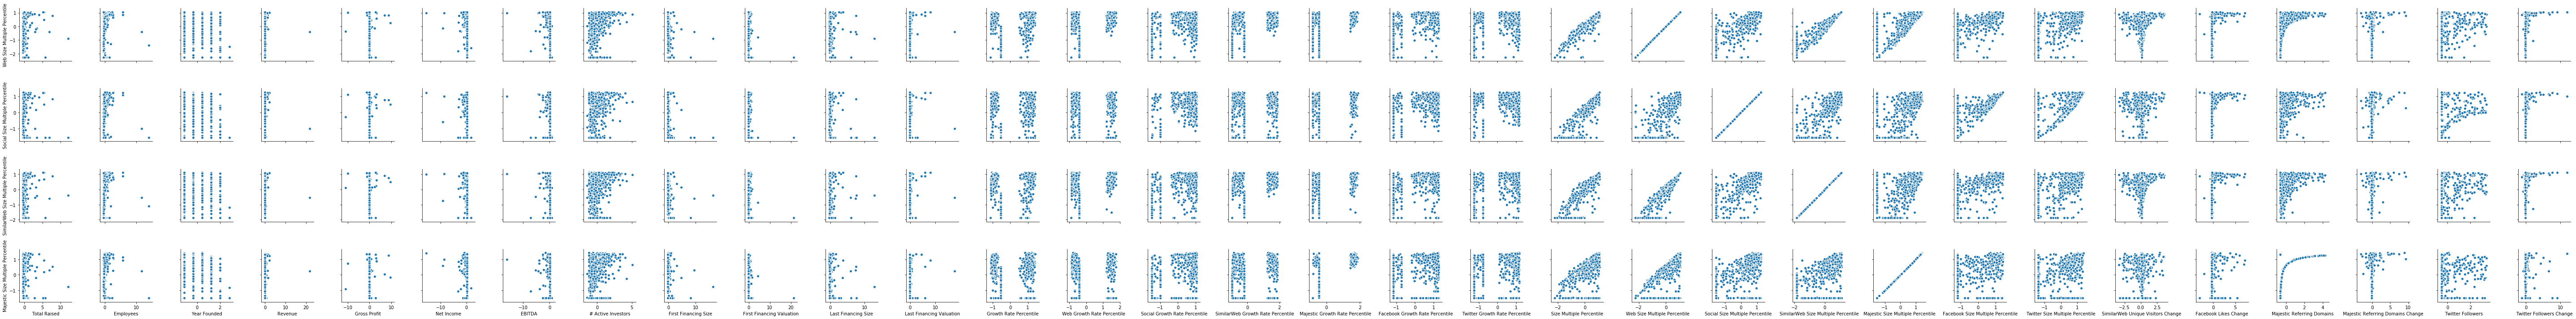

In [40]:
# example look at how all attributes relate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[20:24]
)
plt.show()

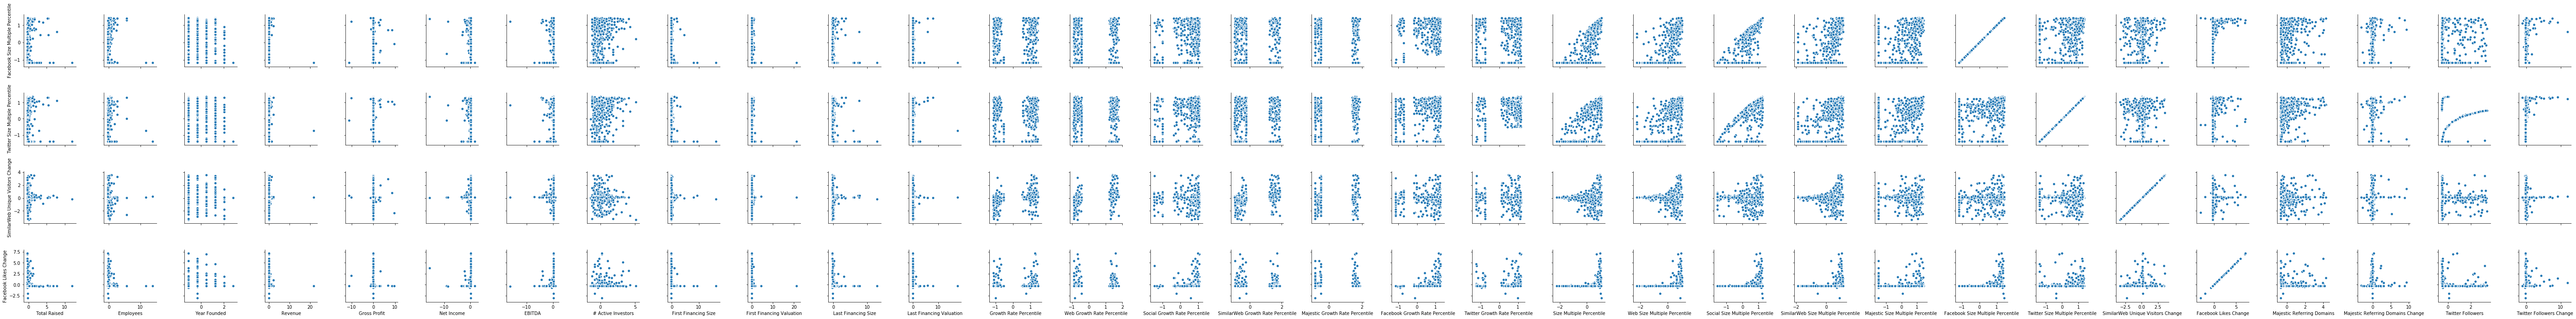

In [41]:
# example look at how all attributes relate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[24:28]
)
plt.show()

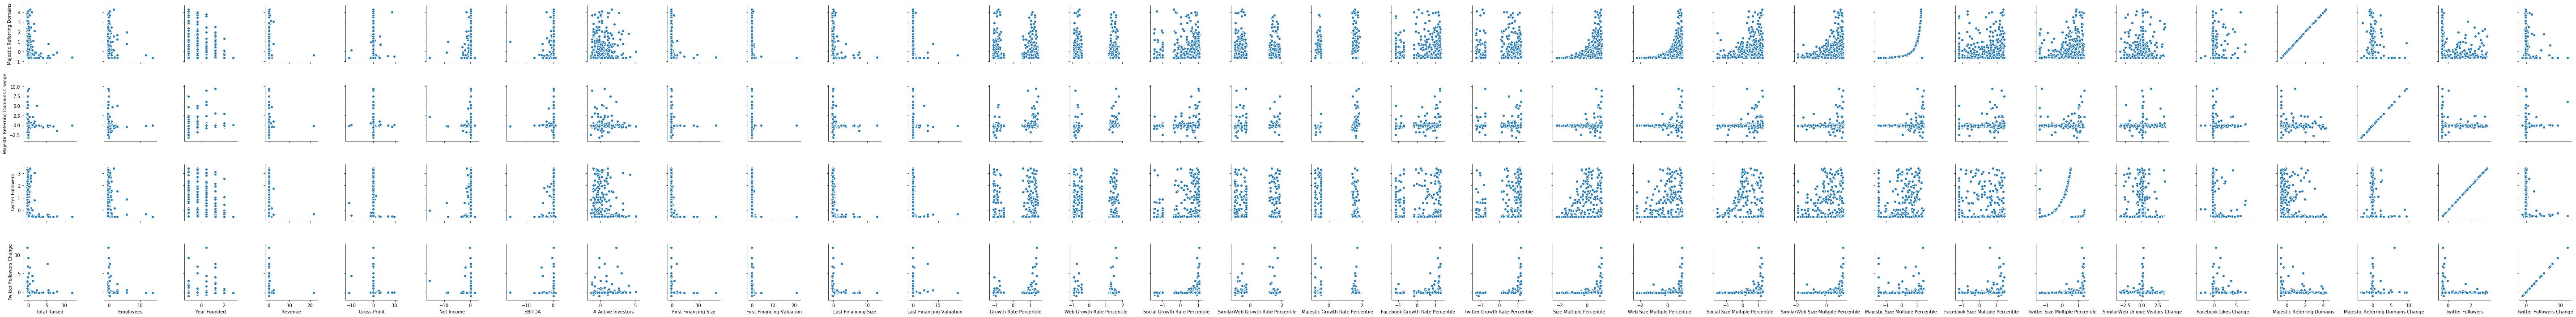

In [42]:
# example look at how all attributes relate to each other
sns.pairplot(
    normalised_numpitchbk,
    x_vars = features,
    y_vars = features[28:]
)
plt.show()